In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d, gaussian_filter, median_filter

In [2]:
from importlib import reload

In [13]:
from twoppp import plot as myplt

In [3]:
import loaddata

In [4]:
# reload(loaddata)

In [150]:
# fly_dir = "/mnt/nas2/JB/230503_DfdxGCaMP6s_DNp09xCsChrimson/Fly3"
# trial_dir = "/mnt/nas2/JB/230503_DfdxGCaMP6s_DNp09xCsChrimson/Fly3/005_xz_cc_p10_postCO2"
# fly_dir = "/mnt/nas2/JB/230509_DfdxGCaMP6s_aDN2xCsChrimson/Fly2"
# trial_dir = "/mnt/nas2/JB/230509_DfdxGCaMP6s_aDN2xCsChrimson/Fly2/001_xz_cc_p20"
# fly_dir = "/mnt/nas2/JB/230512_DfdxGCaMP6s_MDN3xCsChrimson/Fly3"
# trial_dir = "/mnt/nas2/JB/230512_DfdxGCaMP6s_MDN3xCsChrimson/Fly3/002_xz_cc_plevels"
# fly_dir = "/mnt/nas2/JB/230513_DfdxGCaMP6s_MDN3xCsChrimson/Fly1"
# trial_dir = "/mnt/nas2/JB/230513_DfdxGCaMP6s_MDN3xCsChrimson/Fly1/001_xz_wheel_cc_p10"
fly_dir = "/mnt/nas2/JB/230405_DfdxGCaMP6s_aDN2xCsChrimson/Fly6/"
trial_dir = "/mnt/nas2/JB/230405_DfdxGCaMP6s_aDN2xCsChrimson/Fly6/001_t1_p20"

In [151]:
beh_df = loaddata.get_beh_df_with_me(fly_dir=fly_dir, all_trial_dirs=[trial_dir], add_sleap=True)

found 69 nans. will replace them with previous value
found 69 nans. will replace them with previous value
found 69 nans. will replace them with previous value
found 69 nans. will replace them with previous value
found 69 nans. will replace them with previous value
found 69 nans. will replace them with previous value
found 207 nans. will replace them with previous value
found 207 nans. will replace them with previous value
found 200 nans. will replace them with previous value
found 200 nans. will replace them with previous value
found 69 nans. will replace them with previous value
found 69 nans. will replace them with previous value
found 5 nans. will replace them with previous value
found 5 nans. will replace them with previous value
found 69 nans. will replace them with previous value
found 69 nans. will replace them with previous value
found 69 nans. will replace them with previous value
found 69 nans. will replace them with previous value


In [152]:
beh_df.keys()

Index(['t', 'abs_t', 'twop_index', 'v_raw', 'th_raw', 'x', 'y',
       'integrated_forward_movement', 'integrated_side_movement',
       'delta_rot_lab_side', 'delta_rot_lab_forward', 'delta_rot_lab_turn',
       'v', 'th', 'v_forw', 'v_side', 'v_turn', 'laser_stim', 'laser_cond',
       'laser_power', 'laser_power_uW', 'laser_start', 'laser_stop',
       'me_front', 'me_back', 'me_all', 'me_mid', 'anus_x', 'anus_x_rel_neck',
       'anus_y', 'anus_y_rel_neck', 'ovum_x', 'ovum_x_rel_neck', 'ovum_y',
       'ovum_y_rel_neck', 'hrtita_x', 'hrtita_x_rel_neck', 'hrtita_y',
       'hrtita_y_rel_neck', 'mrtita_x', 'mrtita_x_rel_neck', 'mrtita_y',
       'mrtita_y_rel_neck', 'frtita_x', 'frtita_x_rel_neck', 'frtita_y',
       'frtita_y_rel_neck', 'frcofe_x', 'frcofe_x_rel_neck', 'frcofe_y',
       'frcofe_y_rel_neck', 'frfeti_x', 'frfeti_x_rel_neck', 'frfeti_y',
       'frfeti_y_rel_neck', 'stripe4_x', 'stripe4_x_rel_neck', 'stripe4_y',
       'stripe4_y_rel_neck', 'neck_x', 'neck_x_rel_neck'

In [164]:
def me(x1,y1):
    x2 = np.ones_like(x1)*x1[0]
    x2[1:] = x1[:-1]
    y2 = np.ones_like(y1)*y1[0]
    y2[1:] = y1[:-1]
    me = np.sqrt(np.sum([np.square(x1-x2), np.square(y1-y2)], axis=0))
    return np.convolve(me, np.ones(50), 'same') / 50

In [165]:
mef = me(beh_df.frtita_x.values, beh_df.frtita_y.values)
mem = me(beh_df.mrtita_x.values, beh_df.mrtita_y.values)
meh = me(beh_df.hrtita_x.values, beh_df.hrtita_y.values)

mef

array([2.21653072, 2.26542665, 2.31024833, ..., 0.84304445, 0.80809544,
       0.77245876])

In [169]:
frleg_height = beh_df.frleg_height.values  # np.convolve(beh_df.frleg_height, np.ones(10), 'same') / 10

walk = beh_df.v_forw > 1
back = beh_df.v_forw < -1
rest = np.logical_and.reduce([mef <=0.75, mem <=0.75, meh <=0.75, beh_df.v < 0.75, frleg_height > 0])
groom = np.logical_and.reduce([mem <=0.75, meh <=0.75, beh_df.v < 0.75, frleg_height <= 0])
frub = np.logical_and.reduce([mef >0.75, mem <=0.75, meh <=0.75, beh_df.v < 0.75, frleg_height > 0])

post = np.logical_and.reduce([mef <=0.75, meh >0.75, beh_df.v < 0.75, frleg_height <= 0])

<IPython.core.display.Javascript object>


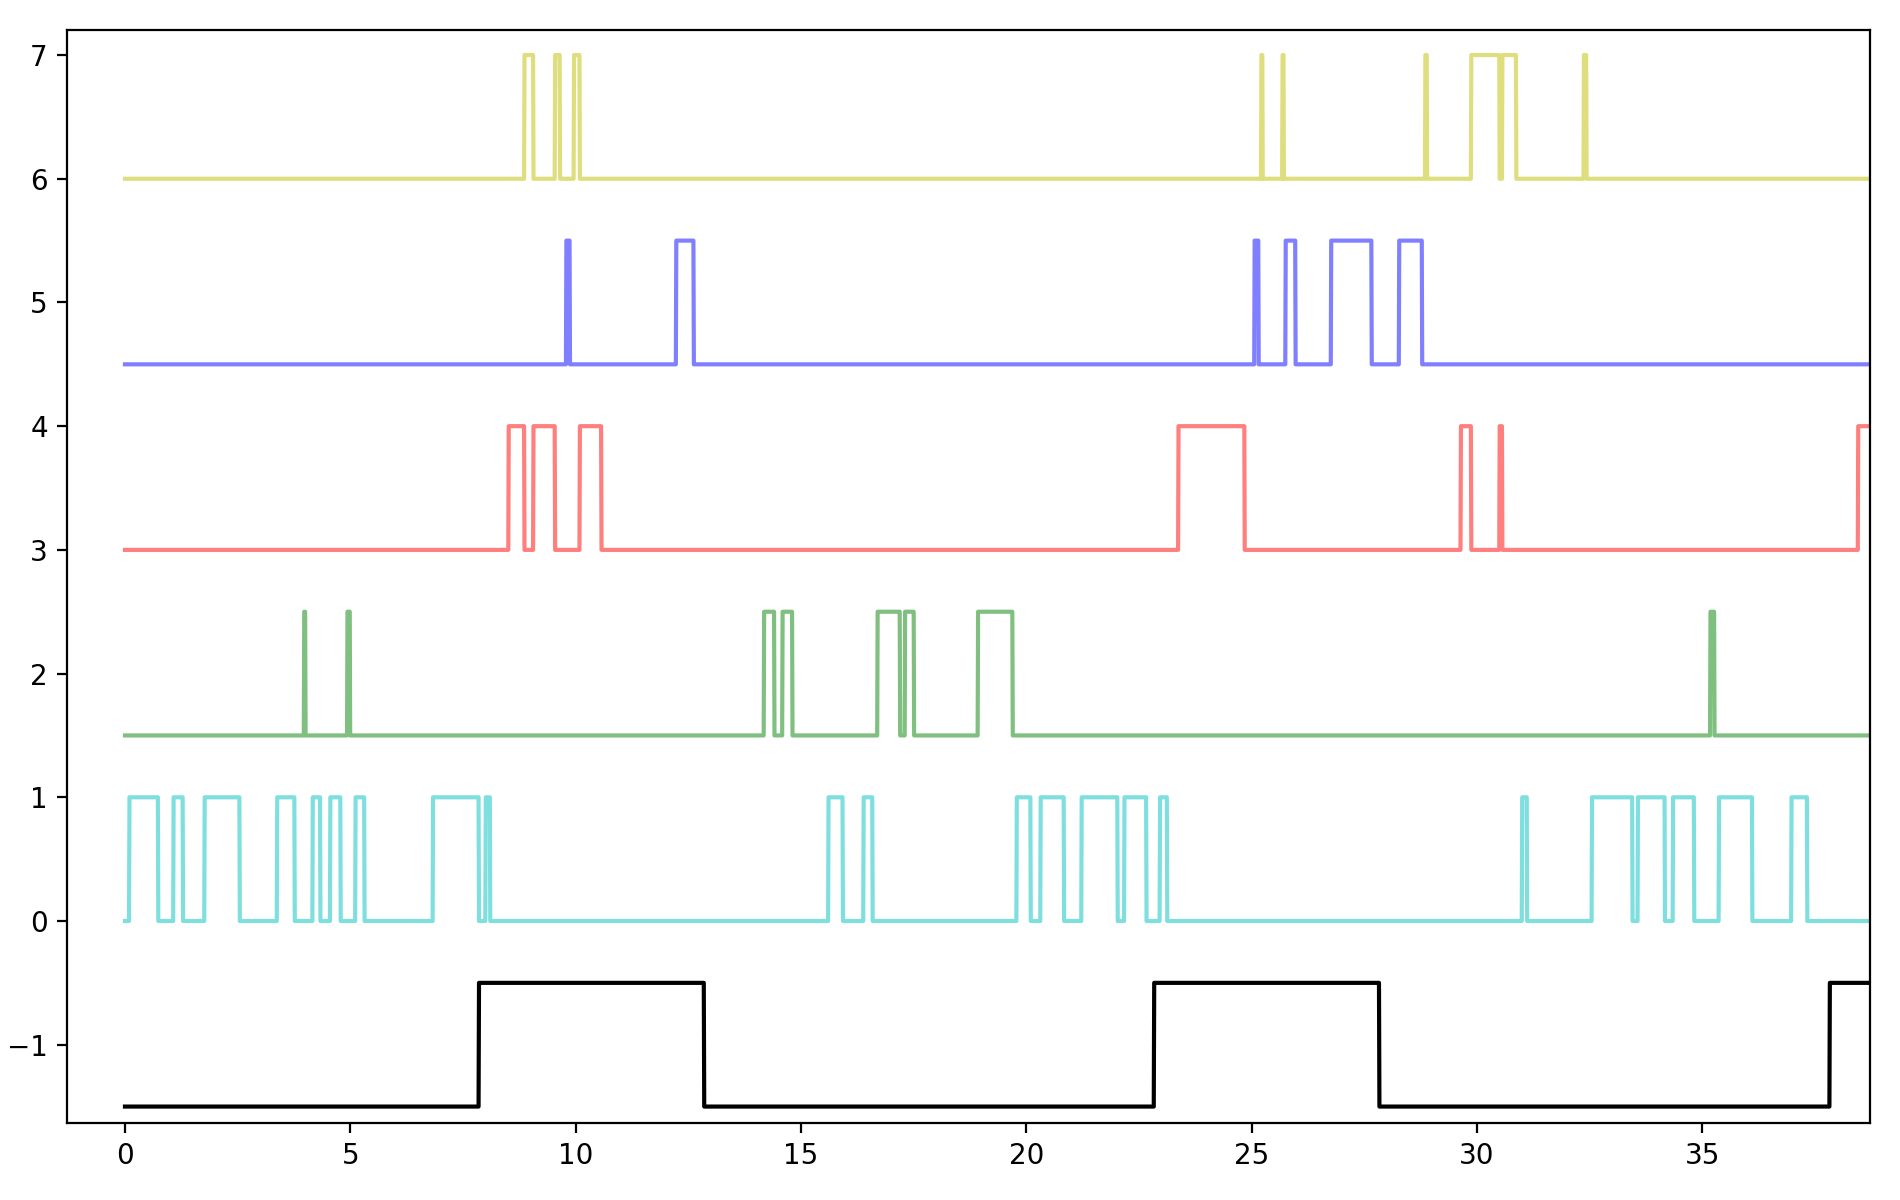

In [170]:
%matplotlib notebook
fig, ax = plt.subplots(1,1,figsize=(9.5,6))
plt.plot(beh_df.t.values-beh_df.t.values[0], beh_df.laser_stim-1.5, "k")
plt.plot(beh_df.t.values-beh_df.t.values[0], back, "c", alpha=0.5)
plt.plot(beh_df.t.values-beh_df.t.values[0], walk + 1.5, "g", alpha=0.5)
plt.plot(beh_df.t.values-beh_df.t.values[0], groom + 3, "r", alpha=0.5)
plt.plot(beh_df.t.values-beh_df.t.values[0],rest+4.5, "b", alpha=0.5)
plt.plot(beh_df.t.values-beh_df.t.values[0],frub+6, "y", alpha=0.5)
# plt.plot(beh_df.t, mef, alpha=0.5)  # (mef - np.mean(mef)) / (2*np.std(mef)))
# plt.plot(beh_df.t, mem)  # (mef - np.mean(mef)) / (2*np.std(mef)))
# plt.plot(beh_df.t, meh)  # (mef - np.mean(mef)) / (2*np.std(mef)))

# plt.plot(beh_df.t,beh_df.frtita_y_rel_neck)
fig.tight_layout()

<IPython.core.display.Javascript object>


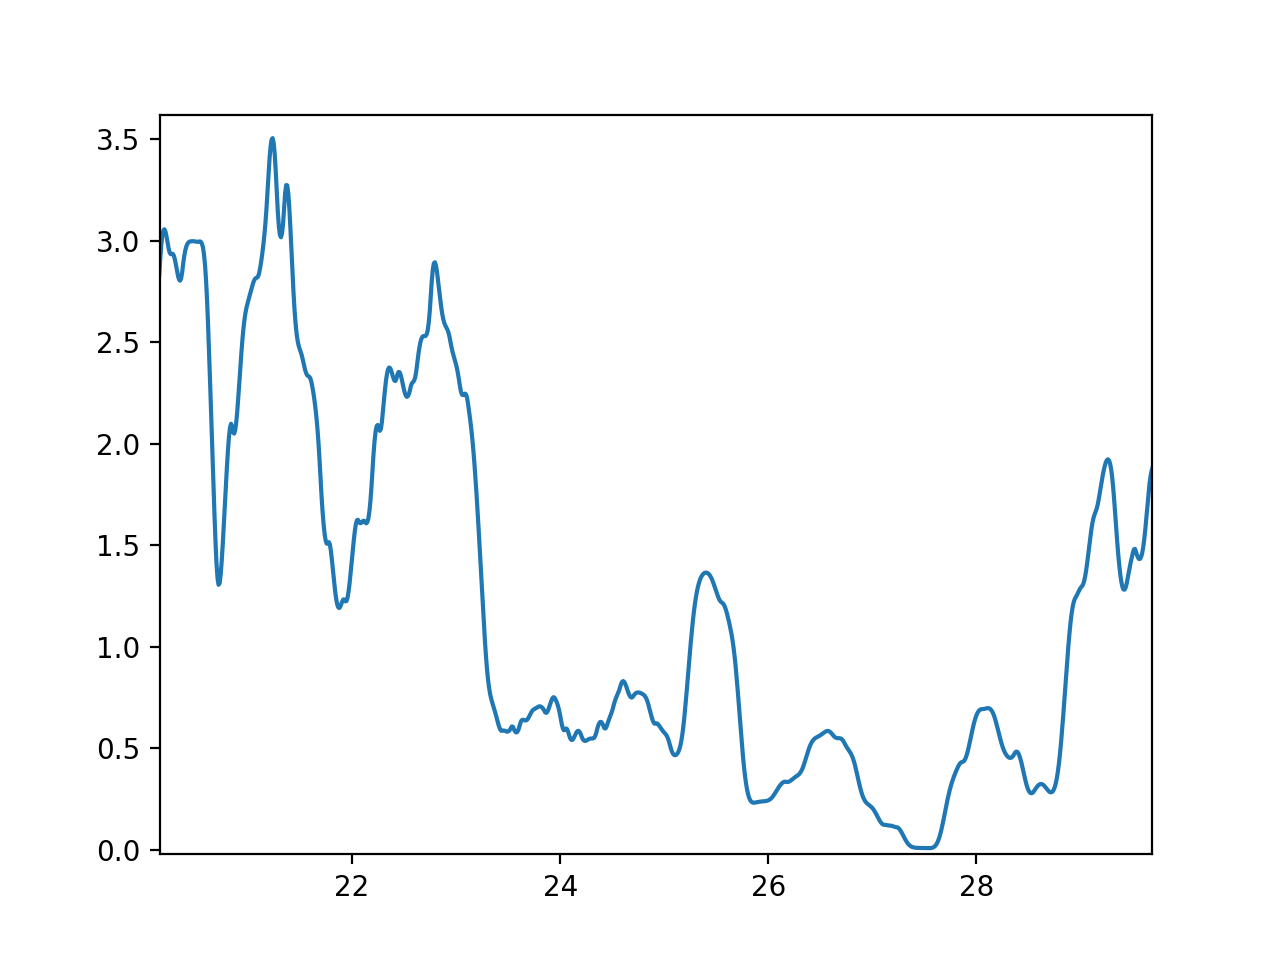

In [171]:
%matplotlib notebook
# plt.plot(beh_df.t,beh_df.frleg_height, "b", alpha=0.1)
# plt.plot(beh_df.t,frleg_height, "r", alpha=0.1)
plt.plot(beh_df.t.values-beh_df.t.values[0], mef)

<IPython.core.display.Javascript object>


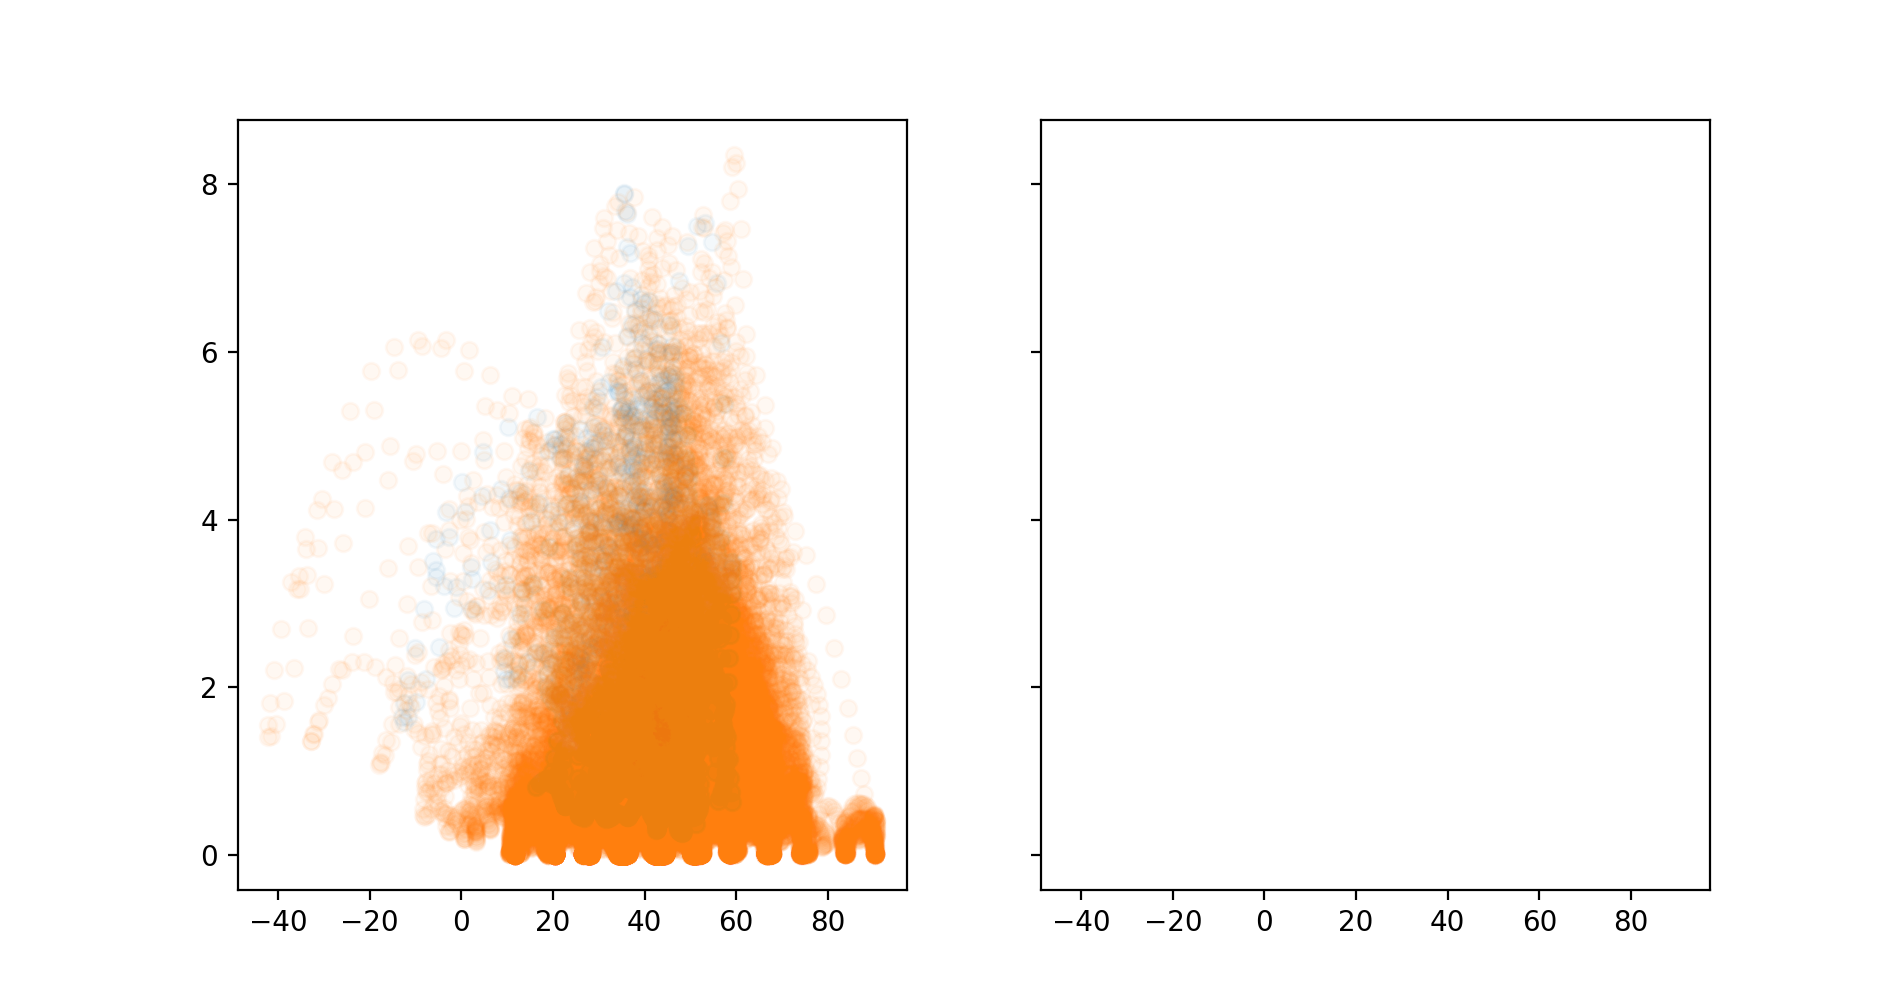

In [124]:
%matplotlib notebook
fig, axs = plt.subplots(1,2,figsize=(9.5,5), sharex=True, sharey=True)
axs[0].scatter(beh_df.frleg_height[beh_df.v_forw > 1], mef[beh_df.v_forw > 1], alpha=0.05)
axs[0].scatter(beh_df.frleg_height[beh_df.v_forw < 1], mef[beh_df.v_forw < 1], alpha=0.05)